## Download and install Spark

In [1]:
!ls

pyspark.ipynb


In [2]:
#!apt-get update
#!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#!wget -q http://archive.apache.org/dist/spark/spark-2.3.1/spark-2.3.1-bin-hadoop2.7.tgz
#!tar xf spark-2.3.1-bin-hadoop2.7.tgz
#!pip install -q findspark

## Setup environment

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.3.1-bin-hadoop2.7"

import findspark
findspark.init()
from pyspark import SparkContext
sc = SparkContext.getOrCreate()

import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate() 
spark

## Downloading and preprocessing Chicago's Reported Crime Data

In [0]:
!wget https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
!ls -l

--2020-01-25 18:21:10--  https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.140.199, 52.206.68.26, 52.206.140.205
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD.2’

rows.csv?accessType     [ <=>                ]   1.55G  3.27MB/s    in 8m 10s  

2020-01-25 18:29:20 (3.24 MB/s) - ‘rows.csv?accessType=DOWNLOAD.2’ saved [1663625358]

total 3555868
-rw-r--r--  1 root root 1663625358 Jan 25 12:06 'rows.csv?accessType=DOWNLOAD'
-rw-r--r--  1 root root   88049606 Jan 25 18:21 'rows.csv?accessType=DOWNLOAD.1'
-rw-r--r--  1 root root 1663625358 Jan 25 12:06 'rows.csv?accessType=DOWNLOAD.2'
drwxr-xr-x  1 root root       4096 Jan 13 16:38  sample_data
drwxrwxr-x 13 1000 1000       4096 Jun  1  2018  spark-2.3.1-bin-hadoop2.7
-rw-r--r-- 

In [0]:
!mv rows.csv\?accessType\=DOWNLOAD reported-crimes.csv
#!ls -l

In [0]:
from pyspark.sql.functions import to_timestamp,col,lit
rc = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') <= lit('2018-11-11'))
rc.show(5)

+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|               Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|11034701|   JA366925|2001-01-01 11:00:00|     016XX E 86TH PL|1153| DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           RESIDENCE| false|   false|0412|     004|   8|            45|      11| 

## Schemas

In [0]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [0]:
rc.select('IUCR').show(5)

+----+
|IUCR|
+----+
|1153|
|0281|
|0620|
|0810|
|0281|
+----+
only showing top 5 rows



In [0]:
rc.select(rc.IUCR).show(5)

+----+
|IUCR|
+----+
|1153|
|0281|
|0620|
|0810|
|0281|
+----+
only showing top 5 rows



In [0]:
rc.select(col('IUCR')).show()

+----+
|IUCR|
+----+
|1153|
|0281|
|0620|
|0810|
|0281|
|0266|
|1751|
|1754|
|0810|
|1153|
|1310|
|2826|
|1153|
|0820|
|1752|
|1150|
|1153|
|2017|
|1753|
|1753|
+----+
only showing top 20 rows



In [0]:
rc.select('Case Number','Date', 'Arrest').show(5)

+-----------+-------------------+------+
|Case Number|               Date|Arrest|
+-----------+-------------------+------+
|   JA366925|2001-01-01 11:00:00| false|
|   JB147188|2017-10-08 03:00:00| false|
|   JB147595|2017-03-28 14:00:00| false|
|   JB147230|2017-09-09 20:17:00| false|
|   JB147599|2017-08-26 10:00:00| false|
+-----------+-------------------+------+
only showing top 5 rows



In [0]:
from pyspark.sql.functions import lit

In [0]:
rc.withColumn('One', lit(1)).show(5)

+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+---+
|      ID|Case Number|               Date|               Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|One|
+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+---+
|11034701|   JA366925|2001-01-01 11:00:00|     016XX E 86TH PL|1153| DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           RESIDENCE| false|   false|0412|     004|   8|            4

In [0]:
rc.show(5)

+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|               Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|11034701|   JA366925|2001-01-01 11:00:00|     016XX E 86TH PL|1153| DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           RESIDENCE| false|   false|0412|     004|   8|            45|      11| 

In [0]:
rc = rc.drop('IUCR')

In [0]:
rc.show(5)

+--------+-----------+-------------------+--------------------+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|               Block|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+--------------------+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|11034701|   JA366925|2001-01-01 11:00:00|     016XX E 86TH PL| DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           RESIDENCE| false|   false|0412|     004|   8|            45|      11|        null|        

In [0]:
one_day = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') == lit('2018-11-12'))


In [0]:
one_day = one_day.drop('IUCR')

In [0]:
one_day.show(5)

+--------+-----------+-------------------+-------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|              Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+-------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|11505149|   JB513151|2018-11-12 00:00:00| 003XX S WHIPPLE ST|0810|             THEFT|           OVER $500|              STREET| false| 

In [0]:
one_day.count()

3

In [0]:
rc.count()

In [0]:
rc.union(one_day).orderBy('Date', ascending=False).show(5)

+--------+-----------+-------------------+--------------------+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|11505149|   JB513151|2018-11-12 00:00:00|  003XX S WHIPPLE ST|              THEFT|           OVER $500|              STREET| false|   false|1124

In [0]:
rc.groupBy('Primary Type').count().show()

+--------------------+-------+
|        Primary Type|  count|
+--------------------+-------+
|OFFENSE INVOLVING...|  45671|
|            STALKING|   3384|
|PUBLIC PEACE VIOL...|  47785|
|           OBSCENITY|    582|
|NON-CRIMINAL (SUB...|      9|
|               ARSON|  11156|
|   DOMESTIC VIOLENCE|      1|
|            GAMBLING|  14422|
|   CRIMINAL TRESPASS| 193370|
|             ASSAULT| 418502|
|      NON - CRIMINAL|     38|
|LIQUOR LAW VIOLATION|  14067|
| MOTOR VEHICLE THEFT| 314144|
|               THEFT|1418411|
|             BATTERY|1232210|
|             ROBBERY| 255600|
|            HOMICIDE|   9457|
|           RITUALISM|     23|
|    PUBLIC INDECENCY|    161|
| CRIM SEXUAL ASSAULT|  27373|
+--------------------+-------+
only showing top 20 rows



In [0]:
rc.select('Arrest').distinct().show()

+------+
|Arrest|
+------+
| false|
|  true|
+------+



In [0]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [0]:
rc.select('Location Description').distinct().show()

+--------------------+
|Location Description|
+--------------------+
|   RAILROAD PROPERTY|
|AIRPORT TERMINAL ...|
|EXPRESSWAY EMBANK...|
|POLICE FACILITY/V...|
|               MOTEL|
|            SIDEWALK|
|AIRPORT TERMINAL ...|
|PUBLIC GRAMMAR SC...|
|CTA GARAGE / OTHE...|
|            CAR WASH|
|   TRUCKING TERMINAL|
|    AIRPORT/AIRCRAFT|
|            HOSPITAL|
|MEDICAL/DENTAL OF...|
|    FEDERAL BUILDING|
|             TRAILER|
|         CTA STATION|
|SCHOOL, PUBLIC, G...|
|SPORTS ARENA/STADIUM|
|                FARM|
+--------------------+
only showing top 20 rows



In [0]:
rc.groupBy('Primary Type').count().orderBy('count', ascending=False).show(20)

+--------------------+-------+
|        Primary Type|  count|
+--------------------+-------+
|               THEFT|1418411|
|             BATTERY|1232210|
|     CRIMINAL DAMAGE| 771496|
|           NARCOTICS| 711588|
|       OTHER OFFENSE| 418815|
|             ASSAULT| 418502|
|            BURGLARY| 388028|
| MOTOR VEHICLE THEFT| 314144|
|  DECEPTIVE PRACTICE| 265223|
|             ROBBERY| 255600|
|   CRIMINAL TRESPASS| 193370|
|   WEAPONS VIOLATION|  70663|
|        PROSTITUTION|  68329|
|PUBLIC PEACE VIOL...|  47785|
|OFFENSE INVOLVING...|  45671|
| CRIM SEXUAL ASSAULT|  27373|
|         SEX OFFENSE|  25270|
|INTERFERENCE WITH...|  15140|
|            GAMBLING|  14422|
|LIQUOR LAW VIOLATION|  14067|
+--------------------+-------+
only showing top 20 rows



In [0]:
total_rows = rc.count()

In [0]:
arrested = rc.filter(rc.Arrest == 'true').count()

In [0]:
print((arrested/ total_rows)*100)

27.75331225060651


In [0]:
rc.groupBy('Location Description').count().orderBy('count', ascending= False).show(3)

+--------------------+-------+
|Location Description|  count|
+--------------------+-------+
|              STREET|1770559|
|           RESIDENCE|1144428|
|           APARTMENT| 698066|
+--------------------+-------+
only showing top 3 rows



In [0]:
from pyspark.sql import functions

In [0]:
print(dir(functions))

['AutoBatchedSerializer', 'Column', 'DataFrame', 'DataType', 'PandasUDFType', 'PickleSerializer', 'PythonEvalType', 'SparkContext', 'StringType', 'UserDefinedFunction', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_binary_mathfunctions', '_collect_list_doc', '_collect_set_doc', '_create_binary_mathfunction', '_create_function', '_create_udf', '_create_window_function', '_functions', '_functions_1_4', '_functions_1_6', '_functions_2_1', '_functions_deprecated', '_lit_doc', '_message', '_string_functions', '_test', '_to_java_column', '_to_seq', '_window_functions', '_wrap_deprecated_function', 'abs', 'acos', 'add_months', 'approxCountDistinct', 'approx_count_distinct', 'array', 'array_contains', 'asc', 'ascii', 'asin', 'atan', 'atan2', 'avg', 'base64', 'bin', 'bitwiseNOT', 'blacklist', 'broadcast', 'bround', 'cbrt', 'ceil', 'coalesce', 'col', 'collect_list', 'collect_set', 'column', 'concat', 'concat_ws', 'conv', 'c

In [0]:
from pyspark.sql.functions import lower, upper, substring

In [0]:
help(substring)

Help on function substring in module pyspark.sql.functions:

substring(str, pos, len)
    Substring starts at `pos` and is of length `len` when str is String type or
    returns the slice of byte array that starts at `pos` in byte and is of length `len`
    when str is Binary type.
    
    .. note:: The position is not zero based, but 1 based index.
    
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(substring(df.s, 1, 2).alias('s')).collect()
    [Row(s='ab')]
    
    .. versionadded:: 1.5



In [0]:
test = rc.select(lower(rc.Description))

In [0]:
test.show()

+--------------------+
|  lower(Description)|
+--------------------+
|financial identit...|
|      non-aggravated|
|      unlawful entry|
|           over $500|
|      non-aggravated|
|           predatory|
|crim sex abuse by...|
|agg sex asslt of ...|
|           over $500|
|financial identit...|
|         to property|
|harassment by ele...|
|financial identit...|
|      $500 and under|
|agg crim sex abus...|
|   credit card fraud|
|financial identit...|
|  manu/deliver:crack|
|sex asslt of chil...|
|sex asslt of chil...|
+--------------------+
only showing top 20 rows



In [0]:
from pyspark.sql.functions import mean, min, max, to_date

In [0]:
rc.select(min(col('Date')),max(col('Date'))).show()

+-------------------+-------------------+
|          min(Date)|          max(Date)|
+-------------------+-------------------+
|2001-01-01 00:00:00|2018-11-10 23:55:00|
+-------------------+-------------------+



In [0]:
nrc = spark.read.csv('reported-crimes.csv', header=True)

In [0]:
nrc.show(2, truncate=False)

+--------+-----------+----------------------+------------------+----+-------------------+-----------------------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+--------+---------+--------+
|ID      |Case Number|Date                  |Block             |IUCR|Primary Type       |Description                        |Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On            |Latitude|Longitude|Location|
+--------+-----------+----------------------+------------------+----+-------------------+-----------------------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+--------+---------+--------+
|11034701|JA366925   |01/01/2001 11:00:00 AM|016XX E 86TH PL   |1153|DECEPTIVE PRACTICE |FINANCIAL IDENTITY THEFT OVER $ 300|RESIDENCE  

In [0]:
nrc.select('IUCR','Date','Arrest').show(10, truncate=False)

+----+----------------------+------+
|IUCR|Date                  |Arrest|
+----+----------------------+------+
|1153|01/01/2001 11:00:00 AM|false |
|0281|10/08/2017 03:00:00 AM|false |
|0620|03/28/2017 02:00:00 PM|false |
|0810|09/09/2017 08:17:00 PM|false |
|0281|08/26/2017 10:00:00 AM|false |
|0266|02/10/2013 12:00:00 AM|false |
|1751|01/01/2015 12:01:00 AM|false |
|1754|01/01/2017 12:01:00 AM|false |
|0810|07/17/2017 10:10:00 AM|false |
|1153|12/28/2017 03:55:00 PM|false |
+----+----------------------+------+
only showing top 10 rows



In [0]:
!wget -O police-station.csv https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD

--2020-01-25 23:33:12--  https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.140.205, 52.206.140.199, 52.206.68.26
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘police-station.csv’

police-station.csv      [ <=>                ]   5.57K  --.-KB/s    in 0s      

2020-01-25 23:33:13 (740 MB/s) - ‘police-station.csv’ saved [5699]



In [0]:
ps = spark.read.csv('police-station.csv', header=True)

In [0]:
ps.show(10)

+------------+--------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|    DISTRICT| DISTRICT NAME|             ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|
+------------+--------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|           1|       Central|     1718 S State St|Chicago|   IL|60616|http://home.chica...|312-745-4290|312-745-3694|312-745-3693| 1176569.052| 1891771.704|41.85837259|-87.62735617|(41.8583725929, -...|
|           6|       Gresham|   7808 S Halsted St|Chicago|   IL|60620|http://home.chica...|312-745-3617|312-745-3649|312-745-3639| 1172283.013| 1853022.646|41.75213684|-87.64422891|(41.752

In [0]:
ps.count()

24

In [0]:
rc.cache()
rc.count()

6752131

In [0]:
ps.printSchema()

root
 |-- DISTRICT: string (nullable = true)
 |-- DISTRICT NAME: string (nullable = true)
 |-- ADDRESS: string (nullable = true)
 |-- CITY: string (nullable = true)
 |-- STATE: string (nullable = true)
 |-- ZIP: string (nullable = true)
 |-- WEBSITE: string (nullable = true)
 |-- PHONE: string (nullable = true)
 |-- FAX: string (nullable = true)
 |-- TTY: string (nullable = true)
 |-- X COORDINATE: string (nullable = true)
 |-- Y COORDINATE: string (nullable = true)
 |-- LATITUDE: string (nullable = true)
 |-- LONGITUDE: string (nullable = true)
 |-- LOCATION: string (nullable = true)



In [0]:
ps.select('DISTRICT','DISTRICT NAME').distinct().show(truncate=True)

+--------------------+-----------------+
|            DISTRICT|    DISTRICT NAME|
+--------------------+-----------------+
|                  16|   Jefferson Park|
|                  12|        Near West|
|                   6|          Gresham|
|                  11|         Harrison|
|                  19|        Town Hall|
|                  24|      Rogers Park|
|                  18|       Near North|
|",Chicago,IL,6060...| -87.6569725149)"|
|                   8|     Chicago Lawn|
|                  25|    Grand Central|
|                   7|        Englewood|
|                  15|           Austin|
|        Headquarters|     Headquarters|
|                  14|      Shakespeare|
|                   4|    South Chicago|
|                   9|          Deering|
|                   2|        Wentworth|
|                  22|      Morgan Park|
|                  17|      Albany Park|
|                   1|          Central|
+--------------------+-----------------+
only showing top

In [0]:
rc.select('District').distinct().show()

+--------+
|District|
+--------+
|     009|
|     012|
|     024|
|    null|
|     031|
|     015|
|     006|
|     019|
|     020|
|     011|
|     025|
|     003|
|     005|
|     016|
|     018|
|     008|
|     022|
|     001|
|     014|
|     010|
+--------+
only showing top 20 rows



In [0]:
from pyspark.sql.functions import lpad

In [0]:
help(lpad)

Help on function lpad in module pyspark.sql.functions:

lpad(col, len, pad)
    Left-pad the string column to width `len` with `pad`.
    
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(lpad(df.s, 6, '#').alias('s')).collect()
    [Row(s='##abcd')]
    
    .. versionadded:: 1.5



In [0]:
ps.select(lpad(col('DISTRICT'), 3, '0')).show()

+--------------------+
|lpad(DISTRICT, 3, 0)|
+--------------------+
|                 001|
|                 006|
|                 011|
|                 016|
|                 Hea|
|                 024|
|                 002|
|                 007|
|                 025|
|                 010|
|                 015|
|                 003|
|                 014|
|                 008|
|                 004|
|                 020|
|                 018|
|                 012|
|                 ",C|
|                 009|
+--------------------+
only showing top 20 rows



In [0]:
ps = ps.withColumn('Format_district',lpad(col('DISTRICT'), 3, '0'))

In [0]:
ps.select('DISTRICT','Format_district').show()

+--------------------+---------------+
|            DISTRICT|Format_district|
+--------------------+---------------+
|                   1|            001|
|                   6|            006|
|                  11|            011|
|                  16|            016|
|        Headquarters|            Hea|
|                  24|            024|
|                   2|            002|
|                   7|            007|
|                  25|            025|
|                  10|            010|
|                  15|            015|
|                   3|            003|
|                  14|            014|
|                   8|            008|
|                   4|            004|
|                  20|            020|
|                  18|            018|
|                  12|            012|
|",Chicago,IL,6060...|            ",C|
|                   9|            009|
+--------------------+---------------+
only showing top 20 rows



In [0]:
ps.columns

['DISTRICT',
 'DISTRICT NAME',
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'Format_district']

In [0]:
nrc.join(ps, nrc.District == ps.Format_district, how='left_outer').drop(
  'ADDRESS',
  'CITY',
  'STATE',
  'ZIP',
  'WEBSITE',
  'PHONE',
  'FAX',
  'TTY',
  'X COORDINATE',
  'Y COORDINATE',
  'LATITUDE',
  'LONGITUDE',
  'LOCATION',
  'Format_district').show(10)

+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+--------------+
|      ID|Case Number|                Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|Year|          Updated On|DISTRICT| DISTRICT NAME|
+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+--------------+
|11034701|   JA366925|01/01/2001 11:00:...|     016XX E 86TH PL|1153|  DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           RESIDENCE| false|   false|0412|     004|   8|            45|      11|2001|08/05/2017 03:50:...|       4| South Chicago|
|11227287|   JB147188|10/08/2017

In [2]:
#new_df = spark.read.csv('reported-crimes.csv', header=True)

In [0]:
# what are the most non-criminial activities

In [226]:
new_df.show(2, truncate=False)

+--------+-----------+----------------------+------------------+----+-------------------+-----------------------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+--------+---------+--------+
|ID      |Case Number|Date                  |Block             |IUCR|Primary Type       |Description                        |Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On            |Latitude|Longitude|Location|
+--------+-----------+----------------------+------------------+----+-------------------+-----------------------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+--------+---------+--------+
|11034701|JA366925   |01/01/2001 11:00:00 AM|016XX E 86TH PL   |1153|DECEPTIVE PRACTICE |FINANCIAL IDENTITY THEFT OVER $ 300|RESIDENCE  

In [209]:
new_df.select(col('Primary Type')).distinct().orderBy('Primary Type').show(30, truncate=False)

+---------------------------------+
|Primary Type                     |
+---------------------------------+
|ARSON                            |
|ASSAULT                          |
|BATTERY                          |
|BURGLARY                         |
|CONCEALED CARRY LICENSE VIOLATION|
|CRIM SEXUAL ASSAULT              |
|CRIMINAL DAMAGE                  |
|CRIMINAL TRESPASS                |
|DECEPTIVE PRACTICE               |
|DOMESTIC VIOLENCE                |
|GAMBLING                         |
|HOMICIDE                         |
|HUMAN TRAFFICKING                |
|INTERFERENCE WITH PUBLIC OFFICER |
|INTIMIDATION                     |
|KIDNAPPING                       |
|LIQUOR LAW VIOLATION             |
|MOTOR VEHICLE THEFT              |
|NARCOTICS                        |
|NON - CRIMINAL                   |
|NON-CRIMINAL                     |
|NON-CRIMINAL (SUBJECT SPECIFIED) |
|OBSCENITY                        |
|OFFENSE INVOLVING CHILDREN       |
|OTHER NARCOTIC VIOLATION   

In [0]:
nc = new_df.filter( (col('Primary Type') == 'NON - CRIMINAL') | (col('Primary Type') == 'NON-CRIMINAL') | (col('Primary Type') == 'NON-CRIMINAL (SUBJECT SPECIFIED) ')).groupBy(col('Description')).count().orderBy('count', ascending=False)

In [222]:
nc.show(10, truncate=False)

+-------------------------------------------+-----+
|Description                                |count|
+-------------------------------------------+-----+
|LOST PASSPORT                              |111  |
|FOID - REVOCATION                          |76   |
|NOTIFICATION OF STALKING - NO CONTACT ORDER|8    |
|CONCEALED CARRY LICENSE REVOCATION         |8    |
|FOUND PASSPORT                             |4    |
|GUN OFFENDER NOTIFICATION-NO CONTACT       |3    |
+-------------------------------------------+-----+



In [212]:
nc.count()

210

In [0]:
#which day of the week has the most reported crime

In [0]:
from pyspark.sql.functions import dayofweek

In [235]:
help(dayofweek)

Help on function dayofweek in module pyspark.sql.functions:

dayofweek(col)
    Extract the day of the week of a given date as integer.
    
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(dayofweek('dt').alias('day')).collect()
    [Row(day=4)]
    
    .. versionadded:: 2.3



In [238]:
rc.select(col('Date'), dayofweek(col('Date'))).show(5)

+-------------------+---------------+
|               Date|dayofweek(Date)|
+-------------------+---------------+
|2001-01-01 11:00:00|              2|
|2017-10-08 03:00:00|              1|
|2017-03-28 14:00:00|              3|
|2017-09-09 20:17:00|              7|
|2017-08-26 10:00:00|              7|
+-------------------+---------------+
only showing top 5 rows



In [0]:
from pyspark.sql.functions import date_format

In [240]:
rc.select(col('Date'), dayofweek(col('Date')), date_format(col('Date'),'E')).show(5)

+-------------------+---------------+--------------------+
|               Date|dayofweek(Date)|date_format(Date, E)|
+-------------------+---------------+--------------------+
|2001-01-01 11:00:00|              2|                 Mon|
|2017-10-08 03:00:00|              1|                 Sun|
|2017-03-28 14:00:00|              3|                 Tue|
|2017-09-09 20:17:00|              7|                 Sat|
|2017-08-26 10:00:00|              7|                 Sat|
+-------------------+---------------+--------------------+
only showing top 5 rows



In [243]:
#desc
rc.groupBy(date_format(col('Date'),'E')).count().orderBy('count', ascending=False).show() 

+--------------------+-------+
|date_format(Date, E)|  count|
+--------------------+-------+
|                 Fri|1016793|
|                 Wed| 973701|
|                 Tue| 967861|
|                 Sat| 965034|
|                 Thu| 964392|
|                 Mon| 952554|
|                 Sun| 911796|
+--------------------+-------+



In [0]:
crimes = rc.groupBy(date_format(col('Date'),'E')).count().collect()

In [256]:
dow = [x[0] for x in crimes]
noc = [x[1] for x in crimes]
print(dow)
print(noc)

['Sun', 'Mon', 'Thu', 'Sat', 'Wed', 'Tue', 'Fri']
[911796, 952554, 964392, 965034, 973701, 967861, 1016793]


In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
df = pd.DataFrame({'Day_of_week' : dow, 'Number_of_crimes': noc})

In [263]:
df.head(7)

,Day_of_week,Number_of_crimes
0,Sun,911796
1,Mon,952554
2,Thu,964392
3,Sat,965034
4,Wed,973701
5,Tue,967861
6,Fri,1016793


In [0]:
df.sort_values('Number_of_crimes', ascending=False, inplace=True)

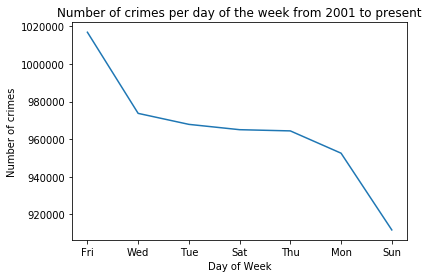

In [282]:
plt.plot(df['Day_of_week'] ,df['Number_of_crimes'])
plt.title('Number of crimes per day of the week from 2001 to present')
plt.xlabel('Day of Week')
plt.ylabel('Number of crimes')
plt.show();

<BarContainer object of 7 artists>

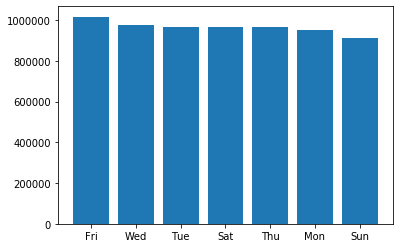

In [276]:
plt.bar(df['Day_of_week'] ,df['Number_of_crimes'])